# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [2]:
df = pd.read_csv('..\\data\\checker_timestamp.csv', parse_dates=['timestamp'])
df.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3207 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


In [4]:
df['date'] = df['timestamp'].dt.date
df['target'] = np.where(df['timestamp'].dt.dayofweek < 5, 'working_day', 'weekend')
df['hour'] = df['timestamp'].dt.hour
df['am'] = np.where((df['timestamp'].dt.hour < 12) & (df['hour'] >= 0), 1, 0)
df['pm'] = np.where((df['timestamp'].dt.hour < 12) & (df['hour'] >= 0), 0, 1)
df.head()

,timestamp,date,target,hour,am,pm
0,2020-04-17 05:19:02.744528,2020-04-17,working_day,5,1,0
1,2020-04-17 05:22:35.249331,2020-04-17,working_day,5,1,0
2,2020-04-17 05:22:45.549397,2020-04-17,working_day,5,1,0
3,2020-04-17 05:34:14.691200,2020-04-17,working_day,5,1,0
4,2020-04-17 05:34:24.422370,2020-04-17,working_day,5,1,0


In [5]:
df.tail()

,timestamp,date,target,hour,am,pm
3202,2020-05-21 20:19:06.872761,2020-05-21,working_day,20,0,1
3203,2020-05-21 20:22:41.785725,2020-05-21,working_day,20,0,1
3204,2020-05-21 20:22:41.877806,2020-05-21,working_day,20,0,1
3205,2020-05-21 20:37:00.129678,2020-05-21,working_day,20,0,1
3206,2020-05-21 20:37:00.290491,2020-05-21,working_day,20,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  3207 non-null   datetime64[ns]
 1   date       3207 non-null   object        
 2   target     3207 non-null   object        
 3   hour       3207 non-null   int64         
 4   am         3207 non-null   int32         
 5   pm         3207 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 125.4+ KB


In [7]:
df = df.groupby(by=['date']).agg({'am': sum, 'pm': sum, 'target': 'last'})
df.head()

,am,pm,target
date,,,
2020-04-17,21,2,working_day
2020-04-18,1,68,weekend
2020-04-19,18,15,weekend
2020-04-20,2,23,working_day
2020-04-21,0,25,working_day


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   am      35 non-null     int32 
 1   pm      35 non-null     int32 
 2   target  35 non-null     object
dtypes: int32(2), object(1)
memory usage: 840.0+ bytes


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

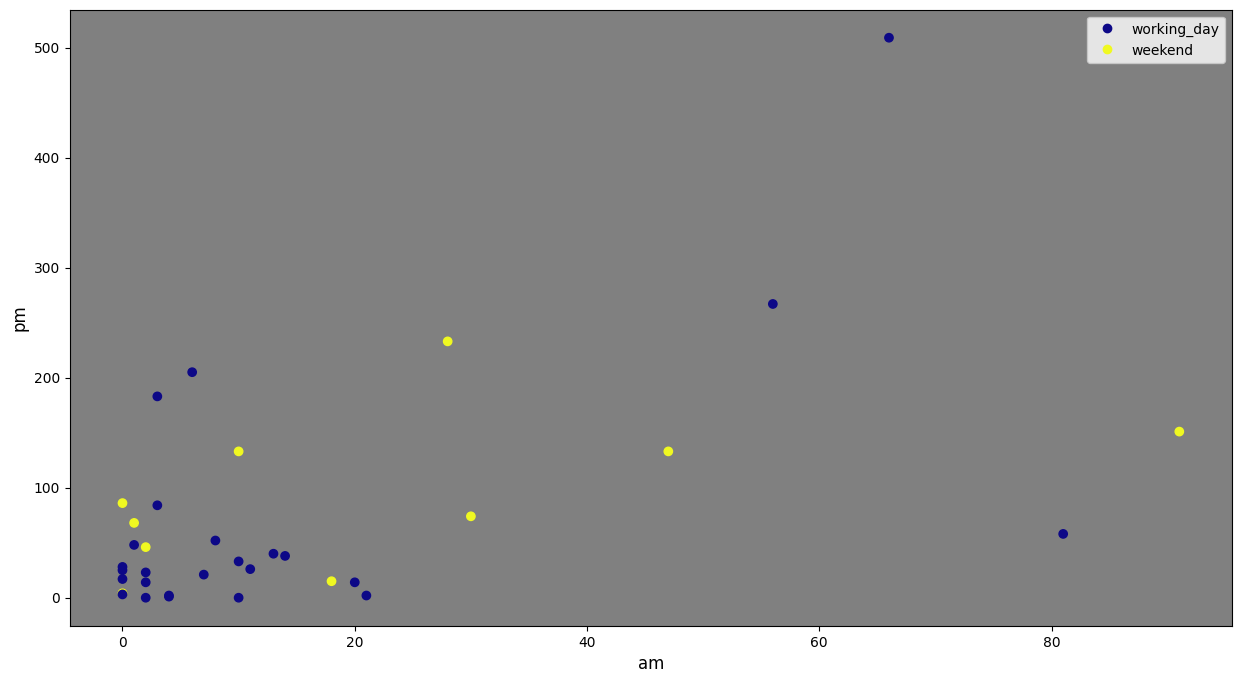

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
ax1 = ax.scatter(x=df['am'], y=df['pm'], c=[0 if i == 'working_day' else 1 for i in df['target']], cmap='plasma')
handles, labels = ax1.legend_elements(prop='colors')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_facecolor('grey')

### No, it is not easy

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [10]:
logreg = LogisticRegression(random_state=21, fit_intercept=False)
x = df[['am', 'pm']].values
y = df['target'].values
logreg.fit(x, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [11]:
df['predict'] = logreg.predict(x)
df.head()

,am,pm,target,predict
date,,,,
2020-04-17,21,2,working_day,weekend
2020-04-18,1,68,weekend,working_day
2020-04-19,18,15,weekend,working_day
2020-04-20,2,23,working_day,working_day
2020-04-21,0,25,working_day,working_day


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   am       35 non-null     int32 
 1   pm       35 non-null     int32 
 2   target   35 non-null     object
 3   predict  35 non-null     object
dtypes: int32(2), object(2)
memory usage: 2.1+ KB


In [13]:
df['predict_state'] = np.where((df['target'] == df['predict']), 1, 0)
df.head()

,am,pm,target,predict,predict_state
date,,,,,
2020-04-17,21,2,working_day,weekend,0
2020-04-18,1,68,weekend,working_day,0
2020-04-19,18,15,weekend,working_day,0
2020-04-20,2,23,working_day,working_day,1
2020-04-21,0,25,working_day,working_day,1


In [14]:
df['predict_state'].value_counts()

1    22
0    13
Name: predict_state, dtype: int64

In [15]:
df.to_csv('../data/am_pm.csv')

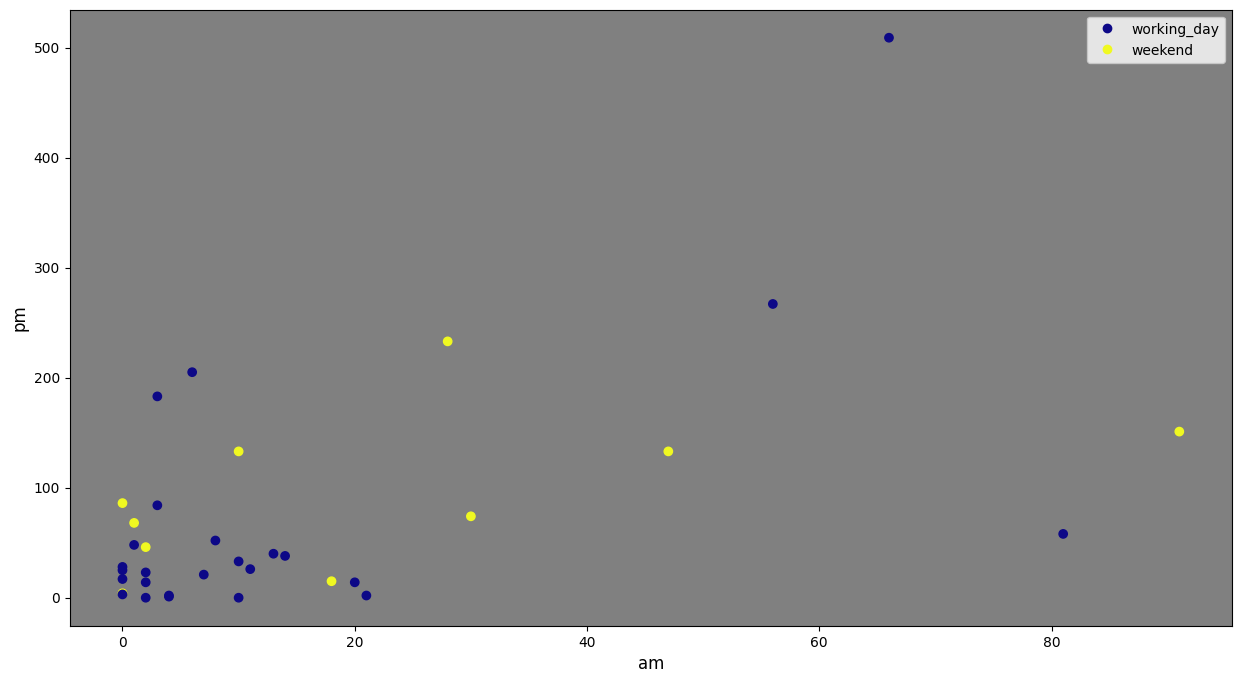

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
ax1 = ax.scatter(x=df['am'], y=df['pm'], c=[0 if i == 'working_day' else 1 for i in df['target']], cmap='plasma')
handles, labels = ax1.legend_elements(prop='colors')
ax.set_xlabel('am', fontsize='large')
ax.set_ylabel('pm', fontsize='large')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_facecolor('grey')

### No, it is not good

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [17]:
accuracy_score(y, df['predict'])

0.6285714285714286

In [18]:
accuracy_score(y, [df['target'].mode().values] * len(y))

0.7142857142857143

### No, it is not good